## Name(s):  

<span style="color:blue; font-size:2em;"> **SETUP** </span>

[You can remove this text from the final report. This is just to help you set up correctly.] 

Some tips for using jupyter notebook:
1. Check whether you are in code or markdown mode in each cell of the report. You can switch between them by clicking on the dropdown.
2. To plot figures, use plot_data() defined below. If you need to insert an image using markdown, you can use this code: `![title](image_folder/image_name.png)`
3. You should not have to edit the python files in the github repository for any of the tasks below. We have shared them just in case though.

## ONLY RUN THE FOLLOWING TWO CELLS FOR COLAB SETUP

Start from here!

In [2]:
# this function creates all in-line plots. DO NOT DELETE.
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt


def plot_data(data, labels=['x','y','z'], title='X,Y,Z Plot'):
    # adjust rcParams as needed to make your graph readable
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.title(title)
    for i in range(len(labels)):
      plt.plot([row[0] for row in data],[row[i+1] for row in data], label=labels[i])
    plt.legend(loc='upper right')
    plt.show()

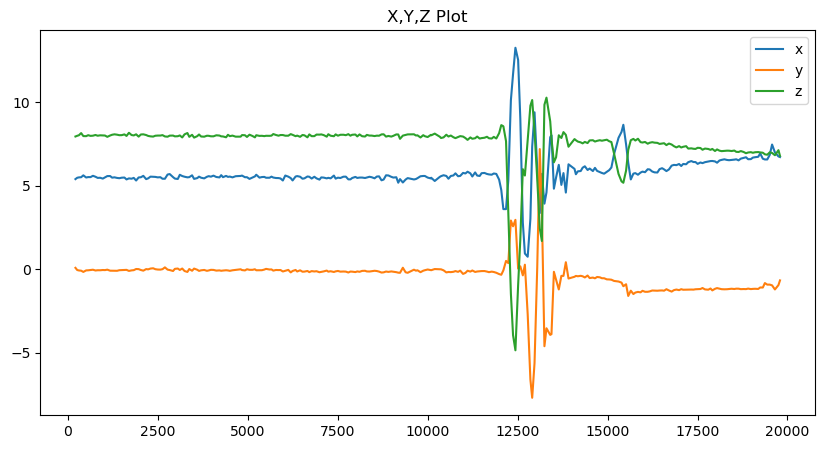

In [3]:
import parser_data
# numpy imported to check if the student has numpy
import numpy


data = parser_data.get_data("test.csv")
plot_data(data)

<span style="color:blue; font-size:2em;"> **TASK 1** </span>

### INSTRUCTIONS

**In your report** <br>

Calculate: <br> 
**a. (1 point)** Open walking_steps.csv collected and check relative_time column. What is the sampling rate for the accelerometer data?

**b. (2 points)** Calculate the variation (σ^2) of your sampling rate using whichever tool you prefer. 

Reflect: <br>
**c. (1 point)** Provide the make and model of the phone you used to measure walking steps 1 (for example, an iPhone, 15 pro).  Decide if your sampling rate is stable for the data you collected in  “walking_steps_1.csv”.<br>

**d. (2 points)** Suppose your data showed signs of an unstable sampling rate, what might be the explanation?
(Hint: https://pure.au.dk/ws/files/93103132/sen099_stisenAT3.pdf)<br>

**e. (2 points)** How does your understanding of your sample rate affect your data processing pipeline?  Do you think the current sampling rate is a good basis for capturing human movements like walking?  Explain your reasoning.<br>

**f. (2 points)** How can we make the data easier to work with?  Choose one method of your choice and briefly explain how the math works.
(Hint: moving average or re-sampling the data with SciPy.  Refer to this video for nice visualizations of Fourier transforms)<br>

In [18]:
#1a
data = parser_data.get_data("walking_steps_1.csv")
print("Walking Steps 1:" + str(data.__len__()) + " rows")
start = data[0][0]
end = data[-1][0]
print(f"Start Time: {data[0][0]}")
print(f"End Time: {data[-1][0]}")
x = (end-start)/len(data)
print(f"Average Sampling Rate: {x} samples/second")
print(f"{1/x} Hz")  

Walking Steps 1:29941 rows
Start Time: 0.042423128
End Time: 74.09873597
Average Sampling Rate: 0.002473408130723757 samples/second
404.30044179865484 Hz


<span style="color:blue; font-size:2em;"> **TASK 2** </span>

### INSTRUCTIONS

**In your report** <br>
**a. (5 points)** Plot X, Y, Z  for walking_steps_1.csv and walking_steps_1_clean.csv <br>
**b. (5 points)** Plot X, Y, Z  for walking_steps2.csv and walking_steps_2_clean.csv <br>

**Code and Data files** <br>
In folder/data - Save walking_steps_1_clean.csv and walking_steps_2_clean.csv<br>
In code: add code to clean_data() below.

**Note : Make sure you add/modify code below or your task 2 will not be graded.**  

In [ ]:
import parser_data


def clean_data(data, num=None):
    # TODO: Write code to remove garbage data

    # Create new file without garbage data and save it in data folder
    file_name_clean = "walking_steps_clean.csv"
    if num is not None:
        file_name_clean = f"data/walking_steps_{num}_clean.csv" 
        with open(file_name_clean, "w") as f:
            f.write("time,X,Y,Z\n")
            # TODO: write your cleaned data to the file
            


def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}.csv" # Change to your file name 
        data = parser_data.get_data(file_name) #data -- time,X,Y,Z 
        clean_data(data, i)
        newdata = parser_data.get_data(f"walking_steps_{i}_clean.csv")
        
        # TODO: Plot original and clean data


if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 3** </span>

### INSTRUCTIONS

**In your report** <br>

**a. (10 points)**  <br>
Add the plot for **vector magnitude** for walking_steps_1_clean.csv and walking_steps_2_clean.csv.  <br>

Compare the magnitude plots to the raw data and each other. How does the phone’s orientation impact the vector magnitude?<br>

**b. (10 points)**  <br>
Add the plot for moving average for for walking_steps_1_clean.csv and walking_steps_2_clean.csv. 

Describe the difference between the raw magnitude and filtered magnitude.

**c. (5 points)** Develop a method for automated step counting then explain your method. <br>

**d. (15 points)** Add the plot for analyzed accelerometer data for walking_steps_1_clean.csv and walking_steps_2_clean.csv with labels for identified steps.

How many steps were counted? Compare this to ground truth.<br>


**Code**  <br>
1. Modify to implement functions vector_magnitude, moving_average below <br>
2. Implement count_steps below <br>

**Note : Make sure you add/modify code below or your task 3 will not be graded.**  

In [ ]:
from scipy.signal import butter, lfilter
import numpy


def vector_magnitude(data):
    """
    Calculate the magnitude of the vector superposition of data (for
    example, acceleration) on x, y, and z axis

    Arguments:
        data: array of (x, y, z) tuples for a vector

    Returns:
        array of the magnitude of a vector

    TODO:
        Finish this function.
    """
    raise NotImplementedError


def moving_average(data, window_size):
    """ moving average filter

    Implement a simple moving average filter to use as a low pass
    filter

    Arguments:
        data: data be filtered
        window_size: window_size chosen for the data

    Returns:
        The filtered data.

    TODO:
        Finish this function. Think about how you want to handle
        the size difference between your input array and output array.
        You can write it yourself or consider using numpy.convole for
        it:
        https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    raise NotImplementedError

In [ ]:
import parser_data
import numpy
from scipy.signal import find_peaks
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def count_steps(data, data_ID):
    '''
    Counts the number of steps in data and returns the number of steps
    '''
    # TODO: Complete this function.
    num_steps = 0
    
    return num_steps


def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}_clean.csv" 
        data = parser_data.get_data(file_name)
        number_of_steps = count_steps(data, i)
        print("Number of steps counted are : {0:d}".format(number_of_steps))

if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 4** </span>

### INSTRUCTIONS
**In your report** <br>
a. **[(2 points)** Provide the ground truth of the number of steps climbed and landings walked while climbing. 

Import the climbing data into your data folder for your program.

b. **(19 points)** Develop and explain your own algorithm to segment the data into climbing and walking sections then remove the walking segments of data. 

Plot the pre-segmented data and the segmented data for climbing. Make sure the way you plot (colors choices, boxes, lines, titles, etc.) easily differentiates the two plots.

c. **(19 points)** Modify the count_steps() function to find the number of steps climbed. 

Plot the segmented data with labels for counted steps. Explicitly state the number of steps climbed and landings walked along.

**Code and Data files** <br>
In folder /data - Add climbing_steps.csv <br>
Task4.py - modify segment_climbing_walking, count_steps below <br>

**Note: Make sure you add/modify code below or your task 4 will not be graded.**

In [ ]:
import parser_data


def segment_climbing_walking(data):
    '''
    While collecting data on stairs there were times when you were also walking rather than climbing
    It is important to remove the parts from the data where you were walking in between the flight of stairs
    Write your own algorithm to find segments in data which corresponds to climbing only

    This functions returns
    List of tuples (x,y,z) which corresponds to climbing only.
    i.e. remove data points from the original data which corresponds to walking

    TODO: Complete this function.
    '''

    print ('segment_climbing_walking')
    plot_data(data)

    return data


def count_steps(data):
    print ('count_steps')
    num_steps = 0
    '''
    This function counts the number of steps in data and returns the number of steps
    TODO: Complete this function.
    '''
    return num_steps


def main():
    # Get data
    file_name = "test.csv"  # Change this to your data file name
    data = parser_data.get_data(file_name)
    
    segmented_data = segment_climbing_walking(data)
    number_of_steps = count_steps(segmented_data)
    print ("Number of steps counted are :{0:d}".format(number_of_steps))


if __name__== "__main__":
    main()
    

<span style="color:blue; font-size:2em;"> **BONUS: TASK 5** </span>

### INSTRUCTIONS
**In your report** <br>
**(5 points)** Match the dataset to the TA! Write the name of the dataset as provided to you next to the TA’s name. <br>

**(5 points)** Explain your process and methods - how did you go about solving this problem? ATTACH your source-code Python file (task5.py).


**Code and Data files** <br>
In folder /data - Download and unzip the data from Canvas <br>
Task5.py - Modify source-code task5.py below.

**Note: Make sure you add/modify code below or your task 5 will not be graded.**

In [ ]:
""" 
Task 5
Write the code for your task 5 in this file. You can use any method
you want. You can consider using the Bulling work flow. If you want,
you can use machine learning to solve the problem. Scikit learn is a
good python library for machine learning. You can also use the gui
interface of weka. If you do that, write your feature extraction
in this python file and describe how you used the weka gui to build the model.
"""
#your code here:
raise NotImplementedError